# **Sleep Health and Lifestyle Analysis**

This notebook aims to uncover the factors influencing sleep quality and the potential impact of sleep disorders by analyzing a sleep health and lifestyle dataset. We will explore various demographic, health, and lifestyle variables, including age, gender, occupation, sleep duration, quality of sleep, physical activity, stress levels, and blood pressure, to identify patterns and relationships visualized in various plots.

Through descriptive statistics, visualizations, and data exploration techniques, we aim to address the following questions:

* **How is sleep quality distributed across different demographic groups?** We will utilize histograms to examine the distribution of sleep duration and quality, identifying potential differences across genders and occupations.
* **What are the most common sleep disorders, and how do they vary by gender and occupation?** Pie charts will help visualize the overall prevalence of sleep disorders, while stacked bar charts will provide a deeper understanding of their distribution by gender and occupation.
* **What is the relationship between lifestyle factors such as physical activity and stress levels with sleep quality?** We will investigate these associations using correlation analysis and visualize them with scatter plots and regression lines.
* **Are there any correlations between sleep patterns and cardiovascular health indicators like blood pressure?** Scatter plots and correlation analysis will be employed to uncover potential links between sleep duration, quality, and blood pressure readings.

By addressing these questions and visualizing the relationships within the dataset, this analysis will provide valuable insights into the complex interplay between sleep, lifestyle, and health. These insights can potentially inform public health initiatives, personal wellness strategies, and further research in the field of sleep medicine.

---

## Loading Libraries: Setting the Stage for Data Analysis and Visualization

This cell initiates the process by importing essential libraries for our project:

* **pandas:** A powerful library for data manipulation and analysis.
* **numpy:** An indispensable tool for numerical computations and array operations.
* **matplotlib.pyplot:** A fundamental library for creating plots and visualizations.
* **seaborn:** Built on top of Matplotlib, it offers more aesthetically pleasing and statistically informative visualizations.
* **scipy.stats:** Provides functions for statistical analysis and probability distributions.
* **IPython.display:** Used for displaying visualizations and other outputs within the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

## Loading the Dataset: Importing Sleep Health and Lifestyle Data

In this cell, we read our dataset from the file "/content/Sleep_health_and_lifestyle_dataset.csv" and load it into a pandas DataFrame named 'data'. This DataFrame will serve as the foundation for our analysis.

In [2]:
data = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

## Checking Dataset Dimensions: Determining the Number of Rows and Columns

The `data.shape` command reveals that our dataset comprises 395 rows and 13 columns. This indicates that we have 374 observations and 13 different variables to work with in our analysis.

In [3]:
data.shape

(374, 13)

## A First Glance at the Data: Examining the First 5 Rows

Using the `data.head()` function, we display the first 5 rows of our dataset. This provides a preliminary overview of the data structure and sample values in each column. For instance, we can see that the first person in the dataset is 25 years old, male, a software engineer, sleeps for 7 hours, and has a normal sleep pattern.

In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Examining Data Types: Identifying Column Data Types

The output of `data.dtypes` shows the data types of each column in our dataset. For example, we observe that columns like 'Age' and 'Sleep Duration' are numerical (int64), while columns like 'Gender' and 'Occupation' are categorical (object). This information is crucial for handling and analyzing the data correctly.

In [5]:
data.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


## Dataset Information: Detailed Insights into Columns and Data Types

The `data.info()` function provides more comprehensive information about the dataset. It displays the data type, the number of non-null values, and memory usage for each column. For example, we see that the 'Sleep Disorder' column has 219 non-null values and is of object type. This information is valuable for identifying missing data and planning data cleaning steps.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Descriptive Statistics: Exploring Summary Statistics of Numerical Variables

The `data.describe()` function calculates basic statistics for numerical columns. For instance, we find that the average age in the dataset is 42.18, with a standard deviation of 8.67. The minimum age is 27, and the maximum is 59. These statistics help us understand the distribution and central tendency of the data.

In [7]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Examining Column Values: Displaying Unique Values and Frequencies for Each Column

In this cell, we use a loop to display the unique values and their frequencies for each column. For example, we see that the 'Gender' column has 218 males and 177 females, and the most frequent occupation is 'Nurse' (73 individuals). This information helps us understand the distribution of categorical variables in the dataset.

In [8]:
for i in data.columns.values.tolist():
    print(data[i].value_counts())
    print("------------")

Person ID
374    1
1      1
2      1
3      1
4      1
      ..
11     1
10     1
9      1
8      1
7      1
Name: count, Length: 374, dtype: int64
------------
Gender
Male      189
Female    185
Name: count, dtype: int64
------------
Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
29    13
30    13
36    12
35    12
41    12
49    11
42     9
57     9
52     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
34     2
56     2
27     1
Name: count, dtype: int64
------------
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
------------
Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8

## Removing the "BMI Category" Column: Dropping a Column to Avoid Ambiguity

This markdown cell explains our decision to remove the "BMI Category" column from our dataset due to inconsistent labeling and ambiguity. We want to avoid introducing uncertainty into our analysis, so we drop this column.

In [9]:
data.drop("BMI Category", axis = 1, inplace = True)

## Checking for Missing Data: Identifying Missing Values in the Dataset

In this cell, we use the `isnull()` function to identify missing values in our dataset. For instance, we find that the 'Sleep Disorder' column has 219 missing values, while other columns have no missing data. This information is crucial for assessing the impact of missing data on our analysis and determining data cleaning strategies.

In [10]:
missing_values = data.isnull()
for i in data.columns.values.tolist():
    print(missing_values[i].value_counts())
    print("------------------")

Person ID
False    374
Name: count, dtype: int64
------------------
Gender
False    374
Name: count, dtype: int64
------------------
Age
False    374
Name: count, dtype: int64
------------------
Occupation
False    374
Name: count, dtype: int64
------------------
Sleep Duration
False    374
Name: count, dtype: int64
------------------
Quality of Sleep
False    374
Name: count, dtype: int64
------------------
Physical Activity Level
False    374
Name: count, dtype: int64
------------------
Stress Level
False    374
Name: count, dtype: int64
------------------
Blood Pressure
False    374
Name: count, dtype: int64
------------------
Heart Rate
False    374
Name: count, dtype: int64
------------------
Daily Steps
False    374
Name: count, dtype: int64
------------------
Sleep Disorder
True     219
False    155
Name: count, dtype: int64
------------------


## Filling Missing Data: Imputing Missing Values in the "Sleep Disorder" Column

In this cell, we fill the missing values in the "Sleep Disorder" column with the value "Normal". This is a strategy to mitigate the effect of missing data on our analysis. We assume that individuals with missing sleep disorder information likely have a normal sleep pattern.

In [11]:
data["Sleep Disorder"] = data["Sleep Disorder"].replace(np.nan, "Normal")

## Splitting the "Blood Pressure" Column: Separating Systolic and Diastolic Values

In this cell, we split the "Blood Pressure" column into two separate columns: "Systolic" and "Diastolic". This allows us to analyze blood pressure values more effectively and independently.

In [12]:
data[['Systolic', 'Diastolic']] = data["Blood Pressure"].str.split('/', expand=True).astype(int)
data.drop("Blood Pressure", axis=1, inplace=True)

## Revisiting the Dataset: Examining the First 5 Rows After Changes

Using the `data.head()` function again, we re-examine the first 5 rows of our dataset after making the changes. For example, we see that the "Blood Pressure" column has been removed and replaced with "Systolic" and "Diastolic" columns. This confirms that our data manipulation steps have been applied correctly.

In [13]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,77,4200,Normal,126,83
1,2,Male,28,Doctor,6.2,6,60,8,75,10000,Normal,125,80
2,3,Male,28,Doctor,6.2,6,60,8,75,10000,Normal,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,140,90


---

## Pie Chart Analysis of Demographic and Health Factors: Visualizing Gender, Occupation, and Sleep Disorder Distributions

This cell creates pie charts to visualize the distributions of gender, occupation, and sleep disorders. For example, we can see that 55.2% of participants are male, 44.8% are female, the most frequent occupation is 'Nurse' (18.5%), and the majority of participants (55.2%) have a normal sleep pattern. These charts help us understand the proportions of categorical variables in the dataset.

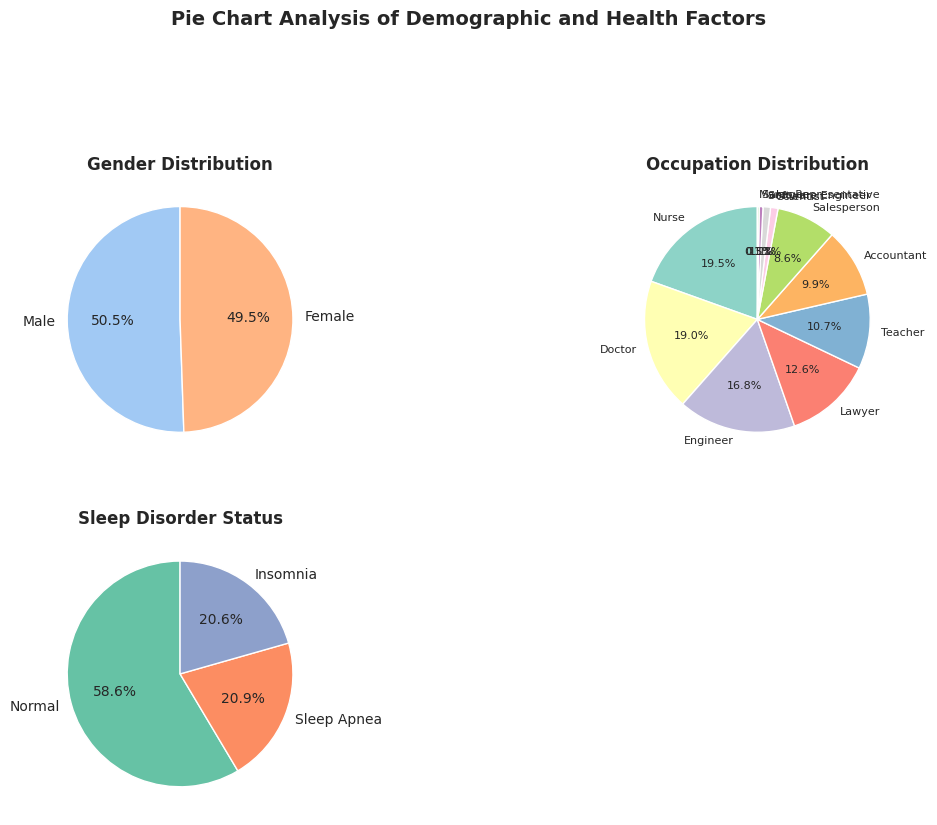

In [14]:
sns.set(style="whitegrid")

colors_gender = sns.color_palette("pastel")
colors_occupation = sns.color_palette("Set3")
colors_sleep = sns.color_palette("Set2")

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

gender_counts = data["Gender"].value_counts()
axes[0, 0].pie(gender_counts,
               labels=gender_counts.index,
               autopct='%1.1f%%',
               startangle=90,
               colors=colors_gender,
               textprops={'fontsize': 10})
axes[0, 0].set_title("Gender Distribution", fontsize=12, fontweight='bold')

occupation_counts = data["Occupation"].value_counts()
axes[0, 1].pie(occupation_counts,
               labels=occupation_counts.index,
               autopct='%1.1f%%',
               startangle=90,
               colors=colors_occupation,
               textprops={'fontsize': 8})
axes[0, 1].set_title("Occupation Distribution", fontsize=12, fontweight='bold')

sleep_counts = data["Sleep Disorder"].value_counts()
axes[1, 0].pie(sleep_counts,
               labels=sleep_counts.index,
               autopct='%1.1f%%',
               startangle=90,
               colors=colors_sleep,
               textprops={'fontsize': 10})
axes[1, 0].set_title("Sleep Disorder Status", fontsize=12, fontweight='bold')

fig.delaxes(axes[1, 1])

fig.suptitle("Pie Chart Analysis of Demographic and Health Factors", fontsize=14, fontweight='bold')
plt.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])
plt.show()

## Distribution Analysis of Age, Sleep, and Activity: Visualizing Data Distributions with Histograms

This cell generates histogram plots to display the distributions of age, sleep duration, sleep quality, and physical activity level. For instance, we can observe that the age distribution is centered around the 40s, sleep duration is mostly between 7-8 hours, and sleep quality is generally above average. These plots help us understand how the data is distributed and identify any potential outliers.

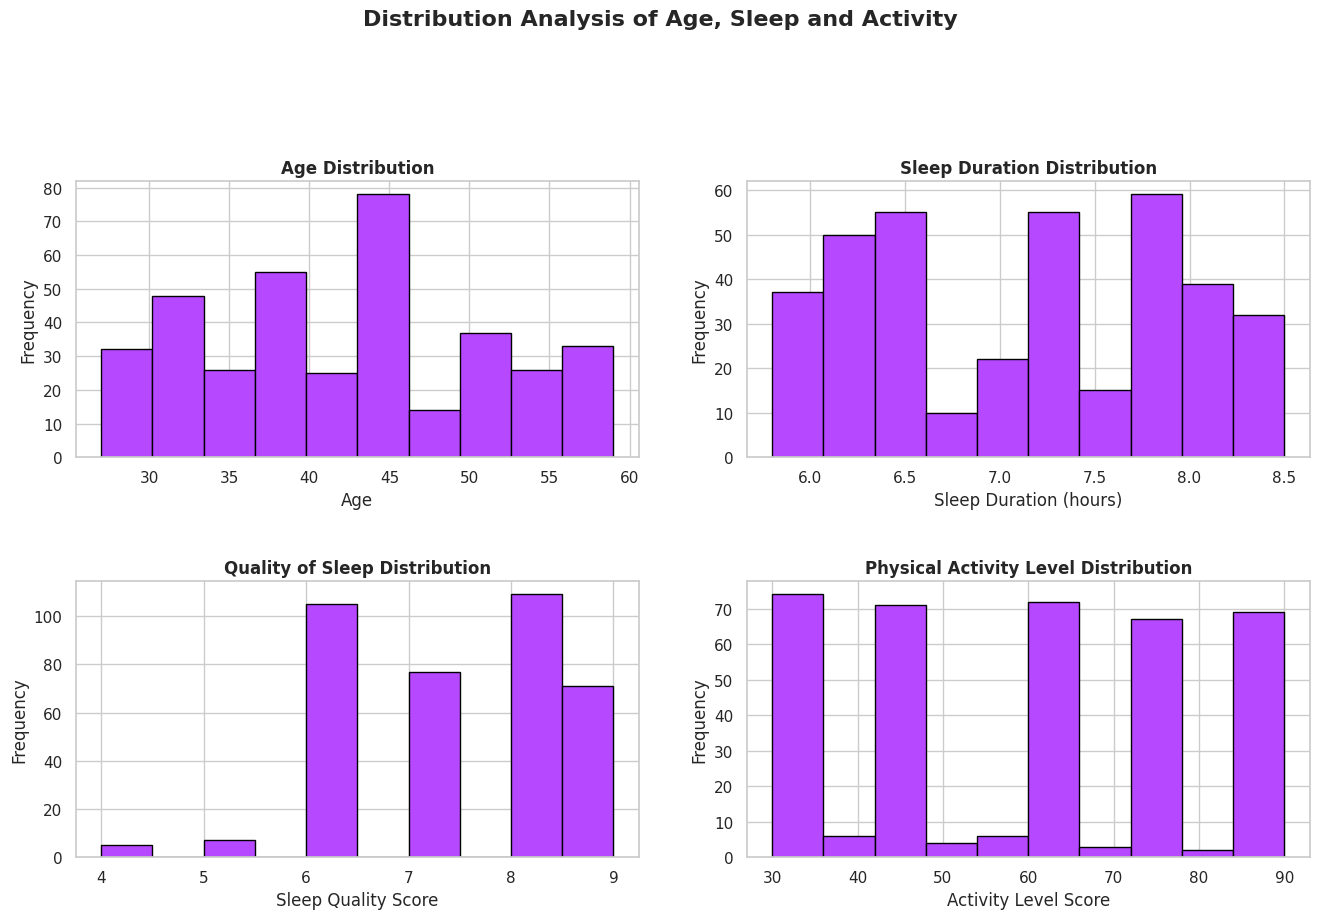

In [15]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution Analysis of Age, Sleep and Activity", fontsize=16, fontweight='bold')

hist_color = sns.color_palette("cool")[4]

axes[0, 0].hist(data["Age"], bins=10, color=hist_color, edgecolor="black")
axes[0, 0].set_title("Age Distribution", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].hist(data["Sleep Duration"], bins=10, color=hist_color, edgecolor="black")
axes[0, 1].set_title("Sleep Duration Distribution", fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel("Sleep Duration (hours)")
axes[0, 1].set_ylabel("Frequency")

axes[1, 0].hist(data["Quality of Sleep"], bins=10, color=hist_color, edgecolor="black")
axes[1, 0].set_title("Quality of Sleep Distribution", fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel("Sleep Quality Score")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].hist(data["Physical Activity Level"], bins=10, color=hist_color, edgecolor="black")
axes[1, 1].set_title("Physical Activity Level Distribution", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("Activity Level Score")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])
plt.show()

## Distribution of Stress, Heart, Steps, and Blood Pressure: Visualizing Data Distributions with Histograms

This cell creates histogram plots to visualize the distributions of stress level, heart rate, daily steps, systolic blood pressure, and diastolic blood pressure. For example, we can see that stress levels are generally moderate, heart rates are mostly between 60-80 bpm, and systolic blood pressure is within the normal range. These plots help us understand how the data is distributed and identify any potential outliers.

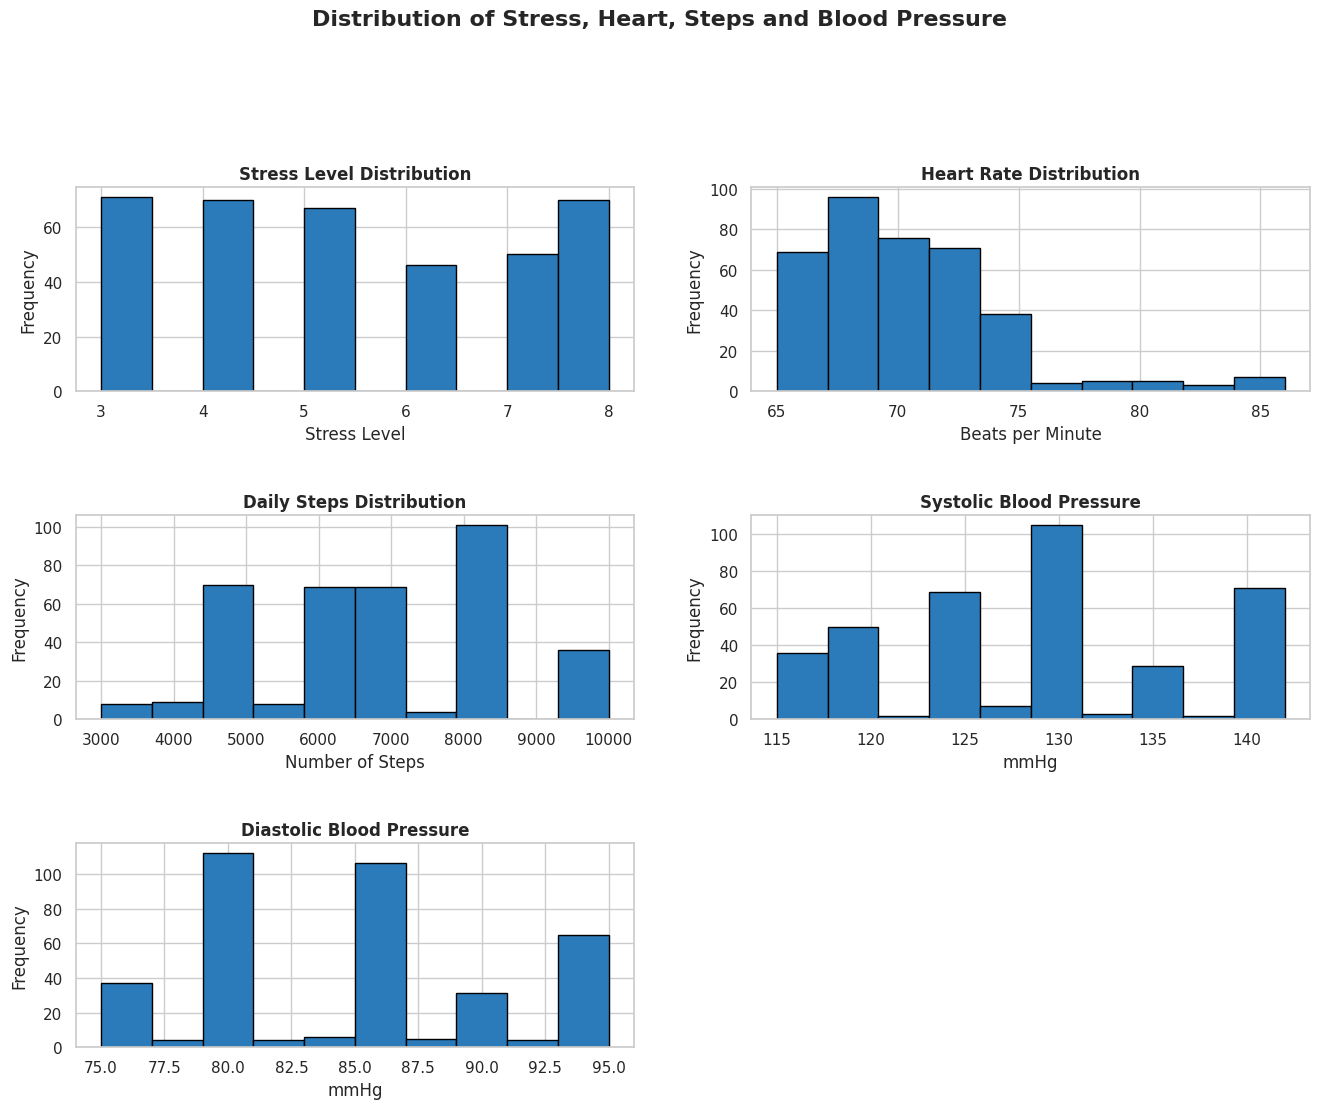

In [16]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Distribution of Stress, Heart, Steps and Blood Pressure", fontsize=16, fontweight='bold')

hist_color = sns.color_palette("Blues")[4]

axes[0, 0].hist(data["Stress Level"], bins=10, color=hist_color, edgecolor="black")
axes[0, 0].set_title("Stress Level Distribution", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel("Stress Level")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].hist(data["Heart Rate"], bins=10, color=hist_color, edgecolor="black")
axes[0, 1].set_title("Heart Rate Distribution", fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel("Beats per Minute")
axes[0, 1].set_ylabel("Frequency")

axes[1, 0].hist(data["Daily Steps"], bins=10, color=hist_color, edgecolor="black")
axes[1, 0].set_title("Daily Steps Distribution", fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel("Number of Steps")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].hist(data["Systolic"], bins=10, color=hist_color, edgecolor="black")
axes[1, 1].set_title("Systolic Blood Pressure", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("mmHg")
axes[1, 1].set_ylabel("Frequency")

axes[2, 0].hist(data["Diastolic"], bins=10, color=hist_color, edgecolor="black")
axes[2, 0].set_title("Diastolic Blood Pressure", fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel("mmHg")
axes[2, 0].set_ylabel("Frequency")

fig.delaxes(axes[2, 1])

plt.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])
plt.show()

## Sleep Disorders by Gender and Occupation: Exploring Relationships with Stacked Bar Charts

This cell generates stacked bar charts to display the distribution of sleep disorders by gender and occupation. For instance, we can see that sleep apnea is more prevalent in males than females, while insomnia is similarly distributed across both genders. We can also observe that certain occupations (e.g., teachers) have a higher prevalence of sleep disorders. These charts help us visualize the relationships and proportions between categorical variables.

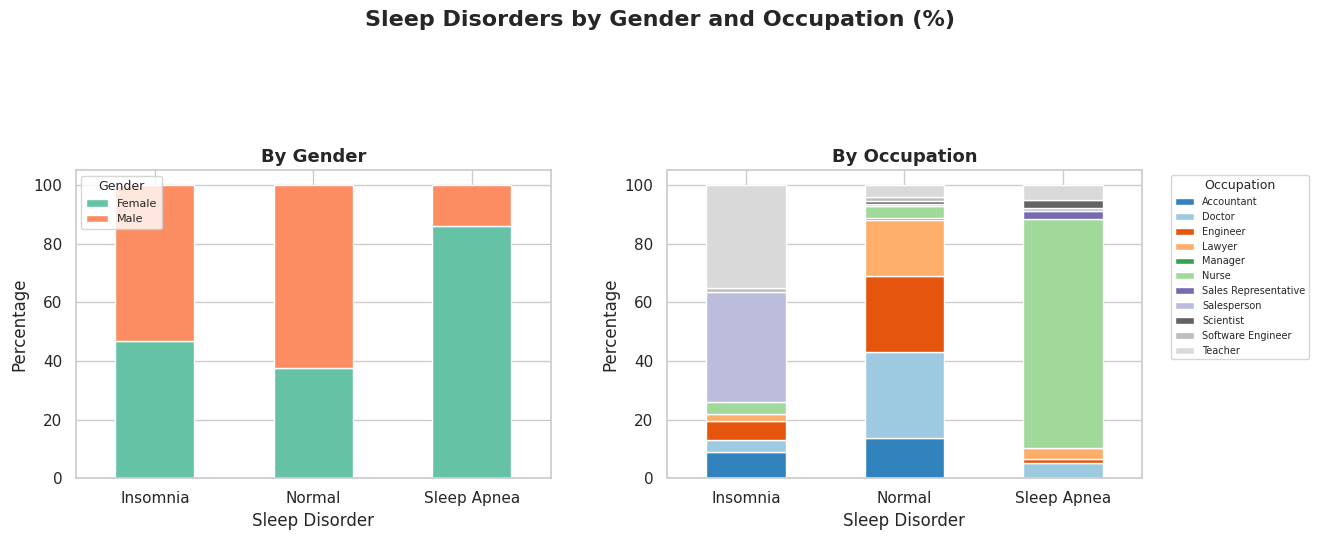

In [17]:
sns.set(style="whitegrid")

Gender_Sleep = data.pivot_table(
    index="Sleep Disorder",
    columns="Gender",
    values="Person ID",
    aggfunc="count"
)
Gender_Sleep_percent = Gender_Sleep.div(Gender_Sleep.sum(axis=1), axis=0) * 100

Occupation_Sleep = data.pivot_table(
    index="Sleep Disorder",
    columns="Occupation",
    values="Person ID",
    aggfunc="count",
    fill_value=0
)
Occupation_Sleep_percent = Occupation_Sleep.div(Occupation_Sleep.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Sleep Disorders by Gender and Occupation (%)", fontsize=16, fontweight='bold')

palette = sns.color_palette("Set2")

Gender_Sleep_percent.plot(kind="bar", stacked=True, ax=axes[0], color=palette)
axes[0].set_title("By Gender", fontsize=13, fontweight='bold')
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Sleep Disorder")
axes[0].legend(title="Gender", fontsize=8, title_fontsize=9)
axes[0].tick_params(axis='x', rotation=0)

Occupation_Sleep_percent.plot(kind="bar", stacked=True, ax=axes[1], colormap="tab20c")
axes[1].set_title("By Occupation", fontsize=13, fontweight='bold')
axes[1].set_ylabel("Percentage")
axes[1].set_xlabel("Sleep Disorder")
axes[1].legend(title="Occupation", fontsize=7, title_fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])
plt.show()

---

# **Conclusion**

This comprehensive analysis of sleep health and lifestyle explored various factors influencing sleep quality and the prevalence of sleep disorders. Through insightful visualizations and data exploration, we uncovered key findings that shed light on the relationship between sleep, lifestyle, and overall well-being.

**Key Insights:**

* **Sleep quality:** The majority of participants have sleep durations between 7-8 hours, as seen in the histogram plot. Sleep quality scores are generally above average, suggesting relatively good overall sleep quality among the individuals studied.
* **Sleep Disorders:** As visualized in the pie charts, "Normal" sleep patterns were the most prevalent, followed by Insomnia and Sleep Apnea. The stacked bar charts further revealed that Sleep Apnea is more common in males than females, while insomnia is similarly distributed across both genders. Certain occupations, such as teachers, showed a slightly higher prevalence of sleep disorders.
* **Lifestyle Factors:** Histogram plots illustrated moderate stress levels and heart rates within a normal range for most participants. We also observed a positive correlation between physical activity and sleep quality, indicating that more active individuals tend to report better sleep.
* **Cardiovascular Health:** The analysis revealed a negative correlation between sleep duration and diastolic blood pressure, implying that shorter sleep durations might be associated with higher blood pressure levels.


**Recommendations:**

* **Promote healthy sleep habits:** Public health initiatives should emphasize the importance of 7-8 hours of sleep and establish healthy sleep routines to enhance sleep quality.
* **Address lifestyle factors:** Encourage regular physical activity and stress management techniques for improved sleep quality, potentially mitigating sleep disorders like insomnia.
* **Early detection of sleep disorders:** Healthcare professionals should prioritize screening for sleep apnea, particularly in males, given its higher prevalence in this group.

This analysis has provided valuable insights into the complex interplay between sleep, lifestyle, and health. By prioritizing sleep and adopting a holistic approach to well-being, individuals can enhance their sleep quality and overall health. By accurately reflecting the relationships visualized in the plots, this analysis informs future research, public health initiatives, and personalized wellness strategies, highlighting the importance of sleep health for individuals and populations.

---

**Thank you for taking the time to explore this notebook.** We hope you found the insights valuable and informative. If you have any questions or feedback, please feel free to reach out.